In [14]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [15]:
iris= pd.read_csv('iris.csv')

In [16]:
iris.shape

(150, 5)

In [17]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [20]:
x= iris.drop('species', axis=1)
y=iris.pop('species')


In [21]:
#Check the dataset
print(y)
print(x)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [23]:
#iris= pd.DataFrame(iris)
#iris1=iris.reset_index()
iris.iloc[:,3].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

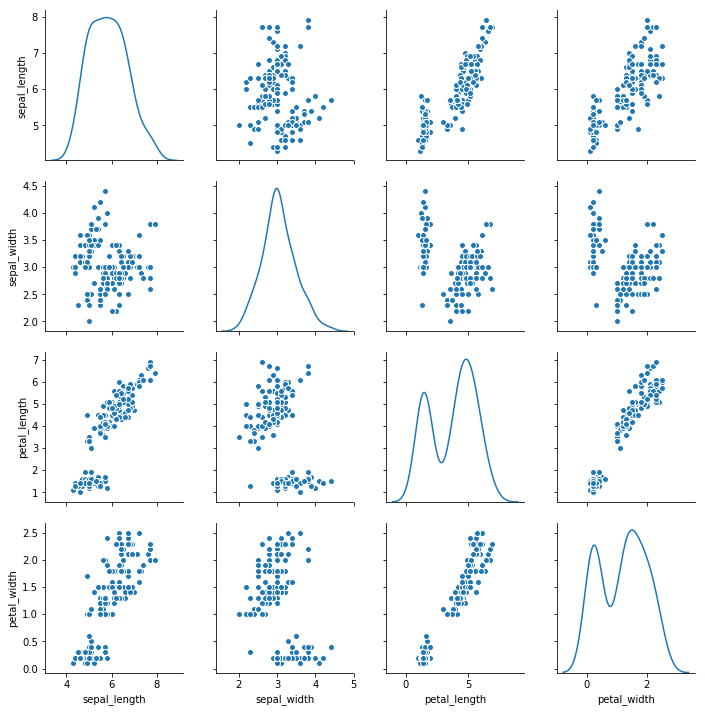

In [24]:
import seaborn as sns
sns.pairplot(iris , diag_kind = "kde")

### Plot the distribution of target variable using histogram

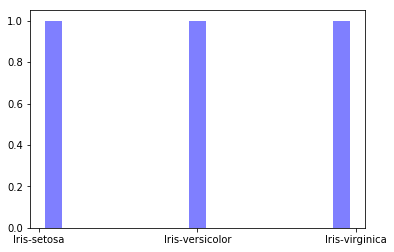

In [25]:
num_bins = 5
n, bins, patches = plt.hist(y, num_bins, facecolor='blue', alpha=0.5)
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

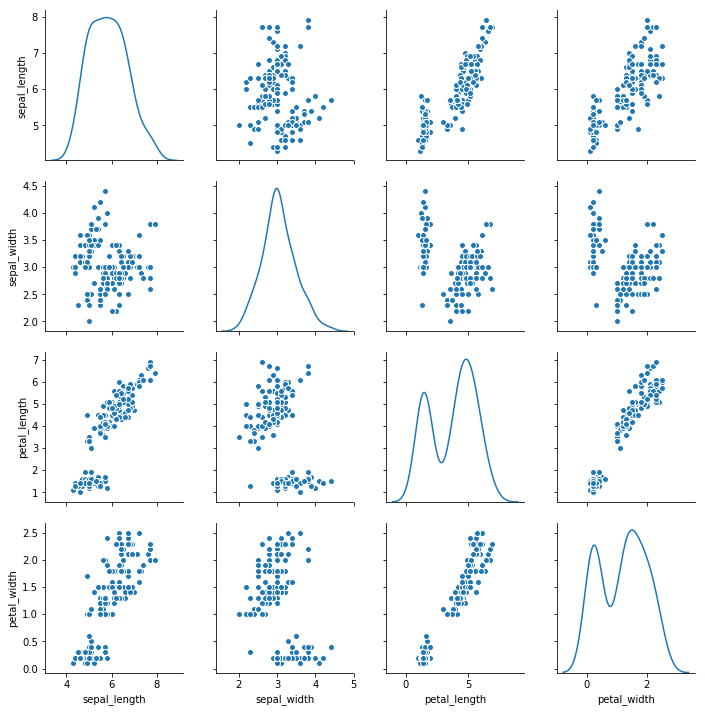

In [26]:
import seaborn as sns
sns.pairplot(iris , diag_kind = "kde")

#Insights- The distribution says sepal length and sepal width is almost a perfect normal curve and is not helpful 
#in deterninng the class

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [27]:
iris.describe()

#Insights- 

####        1: Sepal Length: mean is 5.84 and standard Deviation is 0.83
####Insights2: Petal Length: mean is 3.75 and standard Deviation is 1.76

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Correlation among all variables and give your insights (1 Marks)

In [42]:
iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [47]:
### SPLITTING INTO TRAINING AND TEST SETS

iris2=pd.read_csv('iris.csv')
from sklearn.model_selection import train_test_split

X=iris2.drop('species', axis=1)


In [48]:
y=iris2.pop('species')

In [49]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [51]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

### Do Feature Scaling ( 1 Marks)

In [52]:
# Use StandardScaler or similar methods

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X = StandardScaler().fit_transform(X)

In [55]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

### Train and Fit NaiveBayes Model(2 Marks)

In [56]:
#Fit the model

In [57]:
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB(priors=None)

In [58]:
#Predict

In [59]:
from sklearn import metrics

In [60]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

    avg / total       0.94      0.93      0.93        45



In [61]:
print(metrics.confusion_matrix(test_labels, test_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [62]:
model.score(train_set , train_labels)

0.9523809523809523

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [63]:
# show Confusion Matrix
print(metrics.confusion_matrix(test_labels, test_pred))



[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [64]:
# show accuracy
model.score(train_set , train_labels)

0.9523809523809523

In [65]:
#Show precision and Recall metrics
print(metrics.classification_report(test_labels, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

    avg / total       0.94      0.93      0.93        45

